# Curvilinear Interpolation using `HARK`'s `CurvilinearInterp` class

This notebook uses examples from `scipy` documentation to demonstrate `HARK`'s `WarpedInterpOnInterp2D` class.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from HARK.interpolation import WarpedInterpOnInterp2D
from mpl_toolkits import mplot3d

Suppose we have a collection of values for an unknown function along with their respective coordinate points. For illustration, assume the values come from the following function:


In [2]:
def function_1(x, y):
    return x * (1 - x) * np.cos(4 * np.pi * x) * np.sin(4 * np.pi * y**2) ** 2

The points are randomly scattered in the unit square and therefore have no regular structure.


In [3]:
rng = np.random.default_rng(0)
warp_factor = 0.01
x_list = np.linspace(0, 1, 20)
y_list = np.linspace(0, 1, 20)
x_temp, y_temp = np.meshgrid(x_list, y_list, indexing="ij")
rand_x = x_temp + warp_factor * (rng.random((x_list.size, y_list.size)) - 0.5)
rand_y = y_temp + warp_factor * (rng.random((x_list.size, y_list.size)) - 0.5)
values = function_1(rand_x, rand_y)

Now suppose we would like to interpolate this function on a rectilinear grid, which is known as "regridding".


In [4]:
grid_x, grid_y = np.meshgrid(
    np.linspace(0, 1, 100), np.linspace(0, 1, 100), indexing="ij"
)

To do this, we use `HARK`'s `WarpedInterpOnInterp2D` class. The class takes the following arguments:

- `values`: an ND-array of values for the function at the points
- `grids`: a list of ND-arrays of coordinates for the points
- `method`: the interpolation method to use, with options WarpedInterp, "linear", "cubic" (for 2D only), and "rbf". The default is `'linear'`.


In [5]:
warped_interp = WarpedInterpOnInterp2D(values, (rand_x, rand_y))

Once we create the interpolator objects, we can use them using the `__call__` method which takes as many arguments as there are dimensions.


In [6]:
warped_grid = warped_interp(grid_x, grid_y)

Now we can compare the results of the interpolation with the original function. Below we plot the original function and the sample points that are known.


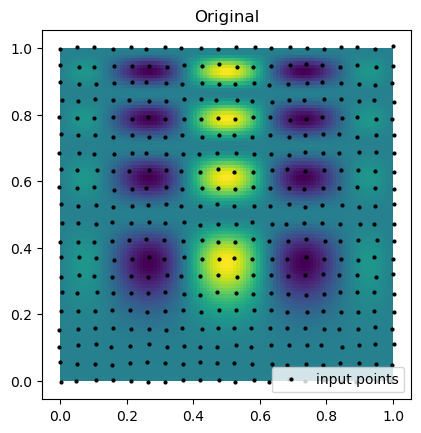

In [7]:
plt.imshow(function_1(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin="lower")
plt.plot(rand_x.flat, rand_y.flat, "ok", ms=2, label="input points")
plt.title("Original")
plt.legend(loc="lower right")

Then, we can look at the result for each method of interpolation and compare it to the original function.


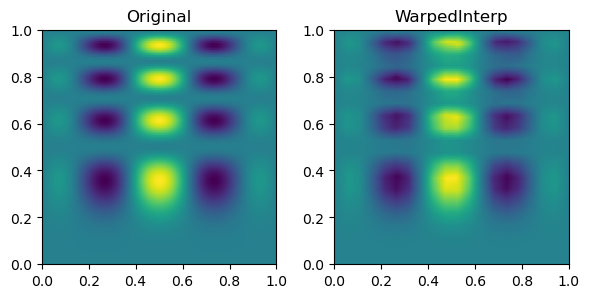

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(6, 6))
titles = ["Original", "WarpedInterp"]
grids = [function_1(grid_x, grid_y), warped_grid]

for ax, title, grid in zip(axs.flat, titles, grids):
    im = ax.imshow(grid.T, extent=(0, 1, 0, 1), origin="lower")
    ax.set_title(title)

plt.tight_layout()
plt.show()

## Another Example


In [9]:
def function_2(x, y):
    return np.hypot(x, y)

In [10]:
rng = np.random.default_rng(0)
warp_factor = 0.05
x_list = np.linspace(-0.5, 0.5, 10)
y_list = np.linspace(-0.5, 0.5, 10)
x_temp, y_temp = np.meshgrid(x_list, y_list, indexing="ij")
rand_x = x_temp + warp_factor * (rng.random((x_list.size, y_list.size)) - 0.5)
rand_y = y_temp + warp_factor * (rng.random((x_list.size, y_list.size)) - 0.5)
values = function_2(rand_x, rand_y)

In [11]:
grid_x, grid_y = np.meshgrid(
    np.linspace(-0.5, 0.5, 100), np.linspace(-0.5, 0.5, 100), indexing="ij"
)

In [12]:
warped_interp = WarpedInterpOnInterp2D(values, (rand_x, rand_y))
warped_grid = warped_interp(grid_x, grid_y)

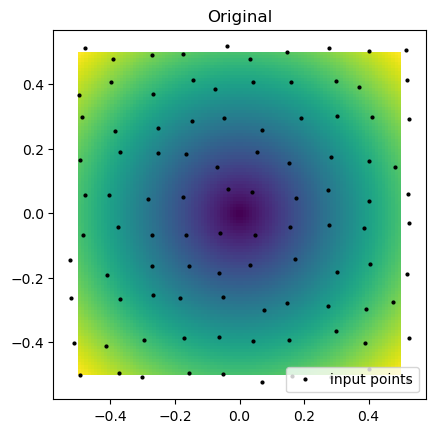

In [13]:
plt.imshow(function_2(grid_x, grid_y), extent=(-0.5, 0.5, -0.5, 0.5), origin="lower")
plt.plot(rand_x.flat, rand_y.flat, "ok", ms=2, label="input points")
plt.title("Original")
plt.legend(loc="lower right")

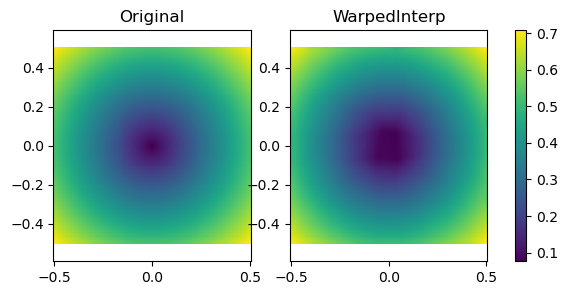

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3))
titles = ["Original", "WarpedInterp"]
grids = [function_2(grid_x, grid_y), warped_grid]

for i, (ax, title, grid) in enumerate(zip(axs.flat, titles, grids)):
    im = ax.pcolormesh(grid_x, grid_y, grid, shading="auto")
    ax.set_title(title)

cbar = fig.colorbar(im, ax=axs)
for ax in axs.flat:
    ax.axis("equal")

plt.show()

# Unstructured Interpolators with Curvilinear Grids


In [15]:
def function_3(u, v):
    return u * np.cos(u * v) + v * np.sin(u * v)

In [16]:
rng = np.random.default_rng(0)
warp_factor = 0.1
x_list = np.linspace(0, 3, 10)
y_list = np.linspace(0, 3, 10)
x_temp, y_temp = np.meshgrid(x_list, y_list, indexing="ij")
rand_x = x_temp + warp_factor * (rng.random((x_list.size, y_list.size)) - 0.5)
rand_y = y_temp + warp_factor * (rng.random((x_list.size, y_list.size)) - 0.5)
values = function_3(rand_x, rand_y)

In [17]:
grid_x, grid_y = np.meshgrid(
    np.linspace(0, 3, 100), np.linspace(0, 3, 100), indexing="ij"
)

In [18]:
warped_interp = WarpedInterpOnInterp2D(values, (rand_x, rand_y))

In [19]:
warped_grid = warped_interp(grid_x, grid_y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


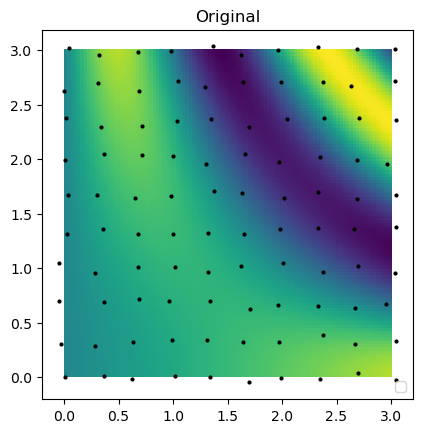

In [20]:
plt.imshow(function_3(grid_x, grid_y).T, extent=(0, 3, 0, 3), origin="lower")
plt.plot(rand_x.flat, rand_y.flat, "ok", ms=2)
plt.title("Original")
plt.legend(loc="lower right")

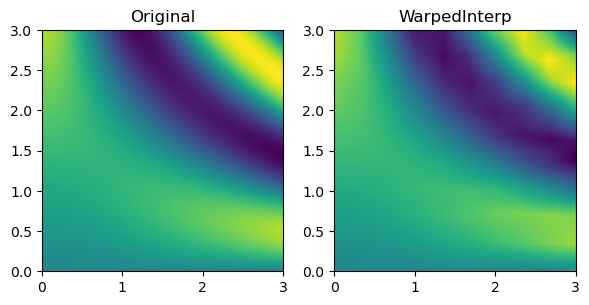

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
titles = ["Original", "WarpedInterp"]
grids = [function_3(grid_x, grid_y), warped_grid]

for ax, title, grid in zip(axs.flat, titles, grids):
    im = ax.imshow(grid, extent=(0, 3, 0, 3), origin="lower")
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [22]:
def function_4(x, y):
    return 3.0 * x**2.0 + x * y + 4.0 * y**2.0

In [23]:
rng = np.random.default_rng(0)
warp_factor = 0.2
x_list = np.linspace(0, 5, 10)
y_list = np.linspace(0, 5, 10)
x_temp, y_temp = np.meshgrid(x_list, y_list, indexing="ij")
rand_x = x_temp + warp_factor * (rng.random((x_list.size, y_list.size)) - 0.5)
rand_y = y_temp + warp_factor * (rng.random((x_list.size, y_list.size)) - 0.5)
values = function_4(rand_x, rand_y)

In [24]:
grid_x, grid_y = np.meshgrid(
    np.linspace(0, 5, 100), np.linspace(0, 5, 100), indexing="ij"
)

In [25]:
warped_interp = WarpedInterpOnInterp2D(values, (rand_x, rand_y))

In [26]:
warped_grid = warped_interp(grid_x, grid_y)

Text(0.5, 1.0, 'Original')

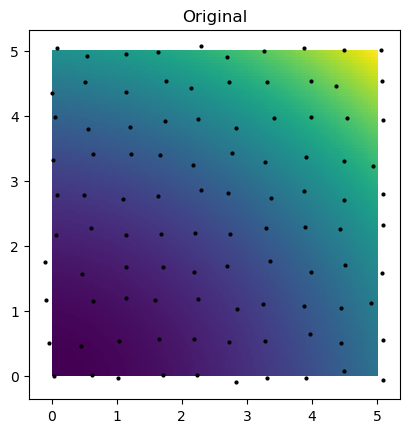

In [27]:
plt.imshow(function_4(grid_x, grid_y).T, extent=(0, 5, 0, 5), origin="lower")
plt.plot(rand_x, rand_y, "ok", ms=2)
plt.title("Original")

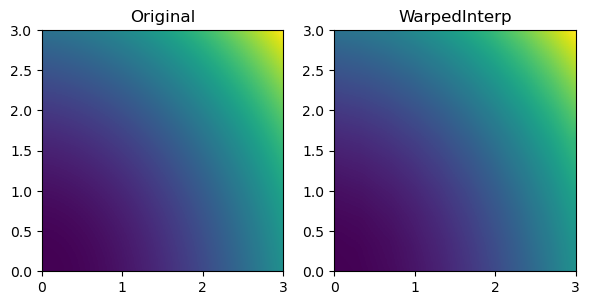

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
titles = ["Original", "WarpedInterp"]
grids = [function_4(grid_x, grid_y), warped_grid]

for ax, title, grid in zip(axs.flat, titles, grids):
    im = ax.imshow(grid, extent=(0, 3, 0, 3), origin="lower")
    ax.set_title(title)

plt.tight_layout()
plt.show()

# More complex functions


In [29]:
def function_5(*args):
    return np.maximum(
        0.0,
        1.0
        - np.exp(0.5 - np.prod(np.asarray(args) + 0.2, axis=0) ** (1.0 / len(args))),
    )

In [30]:
rng = np.random.default_rng(0)
warp_factor = 0.05
x_list = np.linspace(0, 1, 25)
y_list = np.linspace(0, 1, 25)
x_temp, y_temp = np.meshgrid(x_list, y_list, indexing="ij")
rand_x = x_temp + warp_factor * (rng.random((x_list.size, y_list.size)) - 0.5)
rand_y = y_temp + warp_factor * (rng.random((x_list.size, y_list.size)) - 0.5)
values = function_5(rand_x, rand_y)

In [31]:
grid_x, grid_y = np.meshgrid(
    np.linspace(0, 1, 100), np.linspace(0, 1, 100), indexing="ij"
)

In [32]:
warped_interp = WarpedInterpOnInterp2D(values, (rand_x, rand_y))

In [33]:
warped_grid = warped_interp(grid_x, grid_y)

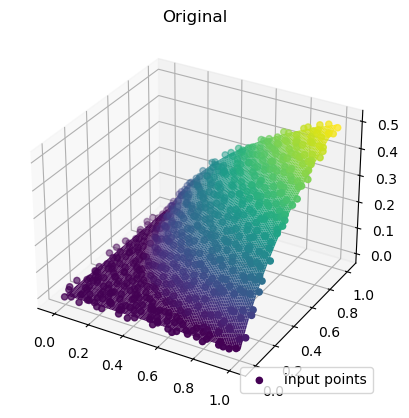

In [34]:
ax = plt.axes(projection="3d")
ax.plot_surface(
    grid_x,
    grid_y,
    function_5(grid_x, grid_y),
    rstride=1,
    cstride=1,
    cmap="viridis",
    edgecolor="none",
)
ax.scatter(rand_x, rand_y, values, c=values, cmap="viridis", label="input points")
plt.title("Original")
plt.legend(loc="lower right")

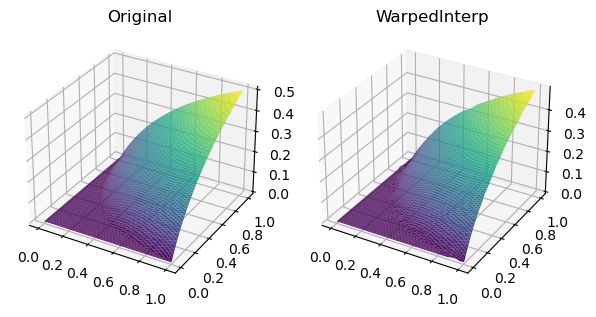

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), subplot_kw={"projection": "3d"})
titles = ["Original", "WarpedInterp"]
grids = [function_5(grid_x, grid_y), warped_grid]

for ax, title, grid in zip(axs.flat, titles, grids):
    im = ax.plot_surface(
        grid_x, grid_y, grid, rstride=1, cstride=1, cmap="viridis", edgecolor="none"
    )
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [36]:
def function_6(x, y):
    return 1 / (np.abs(0.5 - x**4 - y**4) + 0.1)

In [37]:
rng = np.random.default_rng(0)
warp_factor = 0.05
x_list = np.linspace(0, 1, 25)
y_list = np.linspace(0, 1, 25)
x_temp, y_temp = np.meshgrid(x_list, y_list, indexing="ij")
rand_x = x_temp + warp_factor * (rng.random((x_list.size, y_list.size)) - 0.5)
rand_y = y_temp + warp_factor * (rng.random((x_list.size, y_list.size)) - 0.5)
values = function_6(rand_x, rand_y)

In [38]:
grid_x, grid_y = np.meshgrid(
    np.linspace(0, 1, 100), np.linspace(0, 1, 100), indexing="ij"
)

In [39]:
warped_interp = WarpedInterpOnInterp2D(values, (rand_x, rand_y))

In [40]:
warped_grid = warped_interp(grid_x, grid_y)

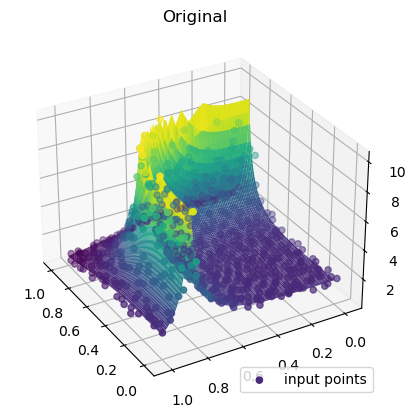

In [41]:
ax = plt.axes(projection="3d")
ax.plot_surface(
    grid_x,
    grid_y,
    function_6(grid_x, grid_y),
    rstride=1,
    cstride=1,
    cmap="viridis",
    edgecolor="none",
)
ax.scatter(rand_x, rand_y, values, c=values, cmap="viridis", label="input points")
ax.view_init(30, 150)
plt.title("Original")
plt.legend(loc="lower right")

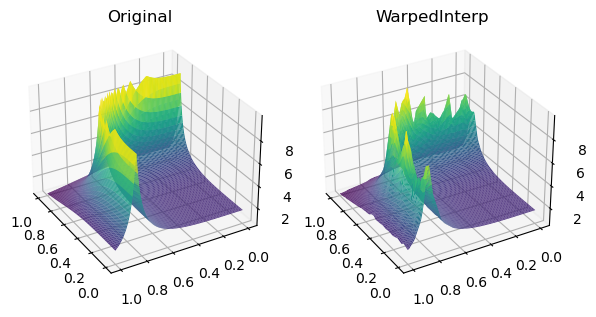

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), subplot_kw={"projection": "3d"})
titles = ["Original", "WarpedInterp"]
grids = [function_6(grid_x, grid_y), warped_grid]

for ax, title, grid in zip(axs.flat, titles, grids):
    im = ax.plot_surface(
        grid_x, grid_y, grid, rstride=1, cstride=1, cmap="viridis", edgecolor="none"
    )
    ax.set_title(title)
    ax.view_init(30, 150)

plt.tight_layout()
plt.show()